In [59]:
import os
# Traverse the directory tree rooted at '/kaggle/input'
# and print the absolute path of each file
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [60]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [61]:
# Display the first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
# Print the shape of the dataframe
df.shape

(10000, 14)

In [63]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [65]:
# Count the occurrences of each value in the "Exited" column of the DataFrame
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [66]:
# Count the values in the "Geography" column of the DataFrame
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [67]:
# Count the occurrences of each value in the "Gender" column
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [68]:
# Count the occurrences of each value in the "Gender" column
df = df.iloc[:,3:]

In [69]:
# Print the first few rows of the dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
# Applying one-hot encoding to the 'Geography' and 'Gender' columns.
pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [71]:
# Assign one-hot encoded data to dataframe
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [72]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [73]:
# Assigning independent and dependent variables
X = df.drop("Exited",axis=1)
y = df["Exited"]

In [74]:
# Performing train,test and split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [75]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [76]:
# necessary libraries for creating ANN
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

### ***Model 1***

In [77]:
# Create the model
model = Sequential()

# Add the first layer with 3 units and sigmoid activation
model.add(Dense(3,activation="sigmoid",input_dim = 11))

# Add the second layer with 1 unit and sigmoid activation
model.add(Dense(1,activation="sigmoid"))

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer="Adam",loss="binary_crossentropy")

In [80]:
# Training the model using the fit() function
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5756
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4953
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4647
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4507
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4425
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4370
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4331
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4303
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4284
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4267


In [81]:
# Accessing the weights of the first layer in the model
model.layers[0].get_weights()

[array([[ 6.21877275e-02,  2.46910546e-02, -2.30065733e-01],
        [-6.11232698e-01, -1.10016596e+00,  1.78615224e+00],
        [-7.72023052e-02,  1.97354898e-01,  3.21899831e-01],
        [-6.20918453e-01,  1.20711155e-01,  7.22397864e-01],
        [-2.37662375e-01,  3.88834059e-01,  1.60468459e-01],
        [-3.34449023e-01,  5.06626256e-02, -2.17723161e-01],
        [ 1.14660394e+00,  6.11715198e-01, -4.02011603e-01],
        [-2.61540711e-01, -1.92706715e-02, -3.25079150e-02],
        [-9.88035917e-01, -5.44496357e-01, -9.24307387e-03],
        [-1.21852368e-01,  2.76918028e-04, -5.36673926e-02],
        [ 3.84434253e-01,  3.24449033e-01, -5.33709168e-01]], dtype=float32),
 array([ 0.4816066 ,  0.5657823 , -0.35480633], dtype=float32)]

In [82]:
# Retrieve the weights of the second layer of the model
model.layers[1].get_weights()

[array([[-0.6347502],
        [-1.9618398],
        [ 0.88073  ]], dtype=float32),
 array([-0.41498026], dtype=float32)]

In [83]:
# Doing prediction
y_pred = model.predict(X_test_scaled)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.10700123],
       [0.13493906],
       [0.13289262],
       ...,
       [0.06053038],
       [0.13067462],
       [0.39115724]], dtype=float32)

In [84]:
# Convert y_pred values to binary based on a threshold of 0.5
y_pred = np.where(y_pred>0.5,1,0)

# Display the resulting y_pred
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [86]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy score
accuracy_score(y_test,y_pred)

0.8135

### ***Model 2***

In [87]:
model = Sequential()

model.add(Dense(11,activation="relu",input_dim = 11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics="accuracy")

In [90]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5497 - accuracy: 0.7623 - val_loss: 0.4976 - val_accuracy: 0.8056
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4611 - accuracy: 0.8042 - val_loss: 0.4482 - val_accuracy: 0.8106
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8188 - val_loss: 0.4200 - val_accuracy: 0.8194
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4022 - accuracy: 0.8325 - val_loss: 0.3978 - val_accuracy: 0.8275
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3842 - accuracy: 0.8428 - val_loss: 0.3834 - val_accuracy: 0.8344
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8503 - val_loss: 0.3740 - val_accuracy: 0.8388
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8542 - val_loss: 0.3706 - val_accuracy: 0.8438

In [92]:
history.history

{'loss': [0.5496967434883118,
  0.4611455202102661,
  0.42484402656555176,
  0.4022240936756134,
  0.38424304127693176,
  0.3720966577529907,
  0.364641010761261,
  0.35939696431159973,
  0.356023907661438,
  0.35285454988479614,
  0.35103631019592285,
  0.34909072518348694,
  0.3474358022212982,
  0.34650853276252747,
  0.34513309597969055,
  0.34376075863838196,
  0.34278857707977295,
  0.3416498303413391,
  0.3407341241836548,
  0.33924633264541626,
  0.3386518955230713,
  0.33794093132019043,
  0.3374468982219696,
  0.3365832269191742,
  0.3363833725452423,
  0.33550530672073364,
  0.3352673351764679,
  0.3344109058380127,
  0.33361929655075073,
  0.3335281014442444,
  0.333114892244339,
  0.3324391543865204,
  0.3321682810783386,
  0.33187243342399597,
  0.33157187700271606,
  0.3317698538303375,
  0.3314424455165863,
  0.33070287108421326,
  0.33103400468826294,
  0.3309273421764374,
  0.3304096460342407,
  0.3303508460521698,
  0.3297140598297119,
  0.3293439447879791,
  0.32918

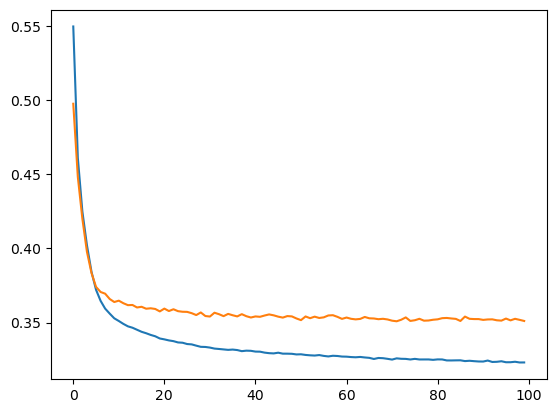

In [93]:
# Plotting the loss and validation loss from the given history.
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

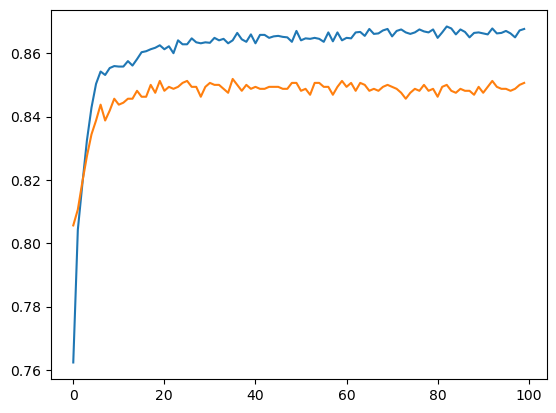

In [94]:
# Plotting the accuracy and validation accuracy from the history object
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [95]:
model.layers[0].get_weights()

[array([[-4.29599881e-02,  1.97667345e-01, -1.09298527e-01,
         -6.14326537e-01, -4.36535239e-01, -7.67527241e-03,
         -5.55398203e-02, -3.36052626e-02,  4.96431664e-02,
          1.64485633e-01,  1.26361355e-01],
        [-7.10286200e-02, -6.36507452e-01,  5.26110828e-01,
          1.66674167e-01, -1.39933795e-01, -1.25538558e-01,
          4.04026955e-01,  1.07781637e+00, -4.40521538e-01,
         -4.17958051e-01,  2.29654416e-01],
        [-4.25477713e-01, -3.09905320e-01, -6.33412972e-02,
          7.42701948e-01, -6.37180924e-01, -2.61904001e-02,
          3.70105244e-02, -4.05435152e-02,  1.28738983e-02,
         -2.24284038e-01, -1.99764341e-01],
        [-3.15315306e-01, -1.07558202e-02, -7.52058268e-01,
          3.95763487e-01, -1.97882250e-01, -9.33340788e-01,
         -1.58331156e-01, -5.11871338e-01,  1.03097863e-01,
         -2.71656871e-01,  5.79808474e-01],
        [-3.89868408e-01, -8.48165825e-02,  1.21481812e+00,
         -2.44774312e-01, -3.64130586e-01,  

In [96]:
model.layers[1].get_weights()

[array([[ 0.08400972,  0.37569746,  0.10710849,  0.2014053 , -0.31818357,
         -0.7770405 ,  0.53559977,  0.66047955, -0.66665393,  0.4867293 ,
         -0.77704436],
        [-0.29491273, -0.4196163 ,  0.33103976,  0.23170206, -0.20783107,
          0.01350529, -0.30279607, -0.7110944 ,  0.20343263, -0.19823326,
         -0.5605556 ],
        [ 0.37323686, -0.02377672,  0.22911683, -0.16872784,  0.7771989 ,
          0.14330822,  0.4564109 ,  0.15317056, -0.43119407, -1.1353794 ,
          0.3852463 ],
        [ 0.46948063, -0.08850073, -0.05536437,  0.17003636,  0.12207168,
         -0.42063132, -0.08727252,  0.11288941,  0.25168675,  0.01491925,
          0.40324968],
        [-0.07192119, -0.02099726,  0.48397812,  0.32165197, -0.5169319 ,
          0.06470063, -0.04504888, -0.32314774, -0.07912027,  0.36063212,
         -0.7770037 ],
        [-0.20939395,  0.40917304,  0.18983462,  0.25023657,  0.0568147 ,
          0.25639245, -0.18959631, -0.19137877, -0.34175238,  0.5834724

In [97]:
model.layers[2].get_weights()

[array([[-0.97178805],
        [-0.555914  ],
        [-0.16263741],
        [-0.95728695],
        [-0.73028094],
        [ 0.69723004],
        [ 1.0865769 ],
        [ 1.1952248 ],
        [-0.8446002 ],
        [ 0.93191963],
        [ 0.7997805 ]], dtype=float32),
 array([-0.04813858], dtype=float32)]

In [98]:
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred>0.5,1,0)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [99]:
accuracy_score(y_test,y_pred)

0.86